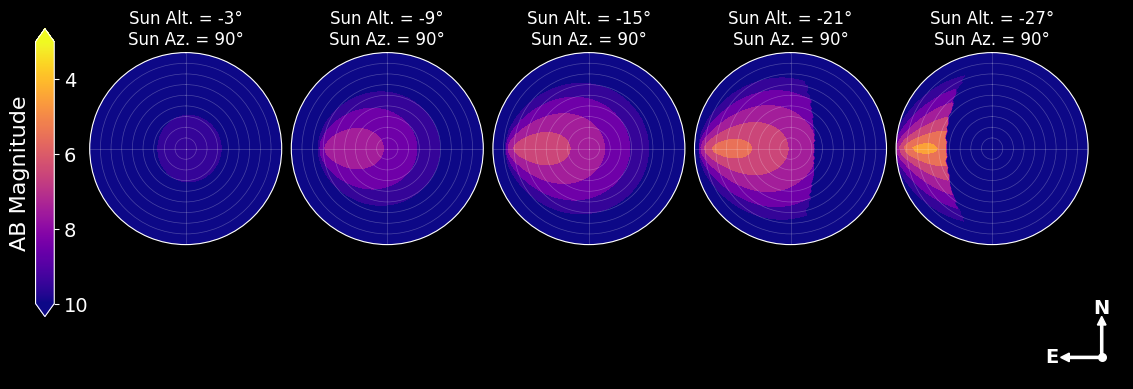

In [1]:
import simple_sat
import lumos.plot

lumos.plot.brightness_summary_observer_frame(
    simple_sat.SURFACES,
    sat_height = 550 * 1000,
    sun_altitudes = [-3, -9, -15, -21, -27],
    sun_azimuths = [90, 90, 90, 90, 90],
    levels = (3, 10)
)

In [2]:
import lumos.calculator
import numpy as np

sat_height = 550 * 1000 # 550 kilometer geodetic height


sat_altitudes, sat_azimuths = \
    np.meshgrid(
    np.linspace(0, 90, 90), 
    np.linspace(0, 360, 180))

intensities = lumos.calculator.get_intensity_observer_frame(
        simple_sat.SURFACES, sat_height, sat_altitudes, sat_azimuths,
        sun_altitude = -27, sun_azimuth = 90,
        include_earthshine = False
    )
    
# Convert intensity to AB Magnitude
ab_magnitudes = lumos.conversions.intensity_to_ab_mag(intensities)

peak_ab_mag = ab_magnitudes.min()
idx = np.argmin(ab_magnitudes)
peak_alt = sat_altitudes.flatten()[idx]
peak_az = sat_azimuths.flatten()[idx]

print( f"Brightest: {peak_ab_mag:0.1f} AB Magnitude")
print( f"Altitude: {peak_alt:0.0f}°")
print( f"Azimuth: {peak_az:0.0f}°")

Brightest: 4.6 AB Magnitude
Altitude: 23°
Azimuth: 91°
